In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df.insert(13, "class", wine_data.target)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Part 1:

In [2]:
# Run Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into X and Y
x_data = wine_df.iloc[:,0:13]
y_data = wine_df.iloc[:,13]

# Get training and test sets with 70% for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=66)

classify0 = tree.DecisionTreeClassifier()
classify0.fit(x_train, y_train)
y_predict = classify0.predict(x_test)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination (r2): 0.90


In [3]:
# First pruning strategy is max leaf nodes of 20 and max_depth of 5 and then 15

classify = tree.DecisionTreeClassifier(max_leaf_nodes=20, max_depth=5)
classify.fit(x_train, y_train)
y_predict = classify.predict(x_test)

# Inspect results
print('Coefficient of determination (r2) for 20 leaf max and max depth of 5: %.2f'
      % r2_score(y_test, y_predict))

# Now for max depth of 15
classify = tree.DecisionTreeClassifier(max_leaf_nodes=20, max_depth=15)
classify.fit(x_train, y_train)
y_predict = classify.predict(x_test)

# Inspect results
print('Coefficient of determination (r2) for 20 leaf max and max depth of 15: %.2f'
      % r2_score(y_test, y_predict))


Coefficient of determination (r2) for 20 leaf max and max depth of 5: 0.93
Coefficient of determination (r2) for 20 leaf max and max depth of 15: 0.93


In [4]:
# Second pruning strategy is min_samples_leaf of 3 and with max_depth still at 5 and 15

classify2 = tree.DecisionTreeClassifier(min_samples_leaf=3, max_depth=5)
classify2.fit(x_train, y_train)
y_predict = classify2.predict(x_test)

# Inspect results
print('Coefficient of determination (r2) for 3 sample leaf min and max depth of 5: %.2f'
      % r2_score(y_test, y_predict))

# Now for max depth of 15
classify2 = tree.DecisionTreeClassifier(min_samples_leaf=3, max_depth=15)
classify2.fit(x_train, y_train)
y_predict = classify2.predict(x_test)

# Inspect results
print('Coefficient of determination (r2) for 3 sample leaf min and max depth of 15: %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination (r2) for 3 sample leaf min and max depth of 5: 0.86
Coefficient of determination (r2) for 3 sample leaf min and max depth of 15: 0.90


### Which strategy worked best?
The strategy where I limited the maximum amount of leaf nodes to 20 per parent and had a max depth of 15. This result did the same as the original result (on some test runs) so it looks like this tree favors a deeper leaf implementation than a shallow build.

## Part 2:

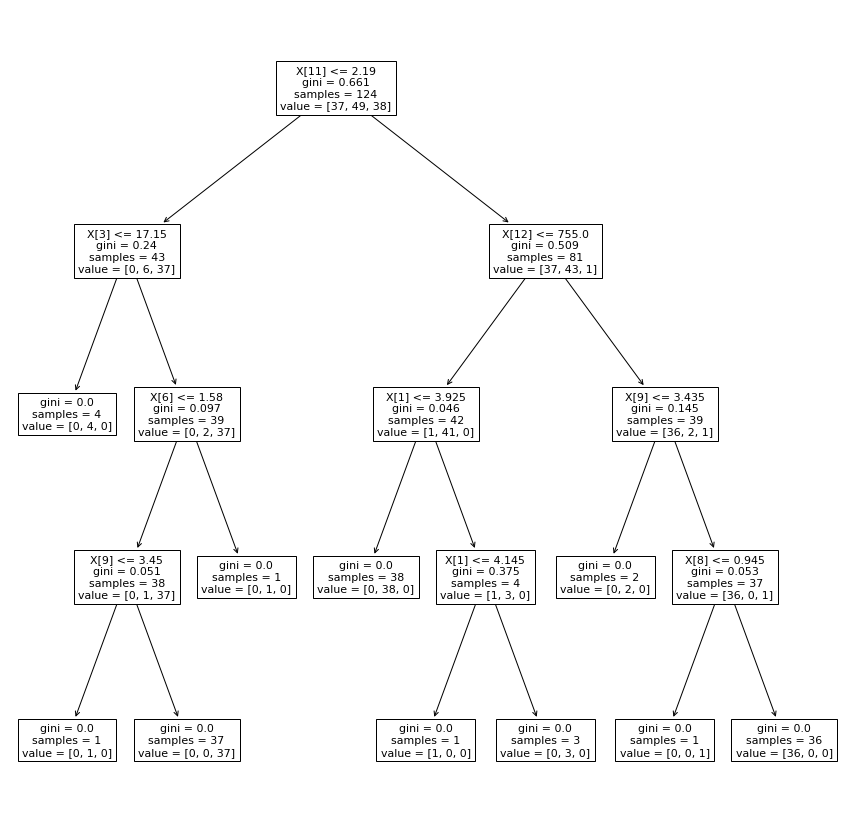

In [5]:
# Plot the best performing tree from part 1
# Choosing tree with max leaf nodes of 20 and max depth of 15
from matplotlib import pyplot as plt
f, axs = plt.subplots(figsize=(15,15))
tree.plot_tree(classify,ax=axs)
plt.show()

C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


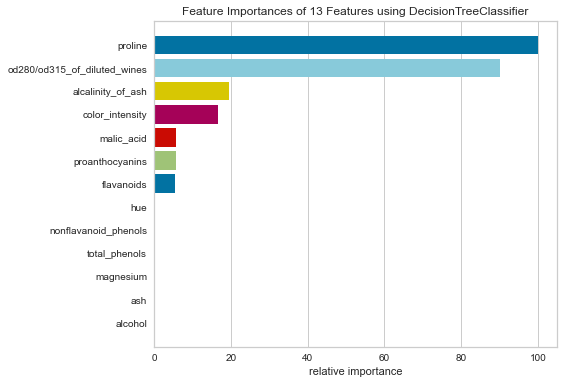

C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000264357AF280>,
                   model=None)

In [6]:
# Plot feature importance
from yellowbrick.model_selection import feature_importances

feature_importances(classify, x_train, y_train)
